In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#add noise at gray level
def make_noisy(image):
    noisy = image + 0.2 * np.random.rand(10, 5)
    noisy = noisy / noisy.max()
    return noisy

#negative distortion (black to white or vice versa)
def make_random_pixel(image):
    rand_index = np.random.randint(0, 50)
    rand_image = np.array(image)
    rand_image[int(rand_index / 5), int(rand_index % 5)] = np.where(rand_image[int(rand_index / 5), int(rand_index % 5)] == 1.0, 0.0, 1.0)
    return rand_image

In [3]:
#activation function
def sigmoid(x):

    return 1/(1 + np.exp(-x))

#derivative of sigmoid
def der_sigmoid(x):
    return np.exp(x)/((np.exp(x)+1)**2)

In [4]:
#initial dataset
image_0 = [[0, 0, 0, 0, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 1, 1, 1, 0],
           [0, 0, 0, 0, 0]]
image_2 = [[0, 0, 0, 0, 0],
           [1, 1, 1, 1, 0],
           [1, 1, 1, 1, 0],
           [1, 1, 1, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 1, 1, 1, 1],
           [0, 1, 1, 1, 1],
           [0, 1, 1, 1, 1],
           [0, 1, 1, 1, 1],
           [0, 0, 0, 0, 0]]
image_4 = [[0,1,1,1,1],
           [0,1,1,1,1],
           [0,1,1,1,1],
           [0,1,1,1,1],
           [0,1,1,1,1],
           [0,1,0,1,1],
           [0,1,0,1,1],
           [0,0,0,0,0],
           [1,1,0,1,1],
           [1,1,0,1,1]]
image_7 = [[0, 0, 0, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 0, 0, 0],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1],
           [1, 1, 1, 0, 1]]

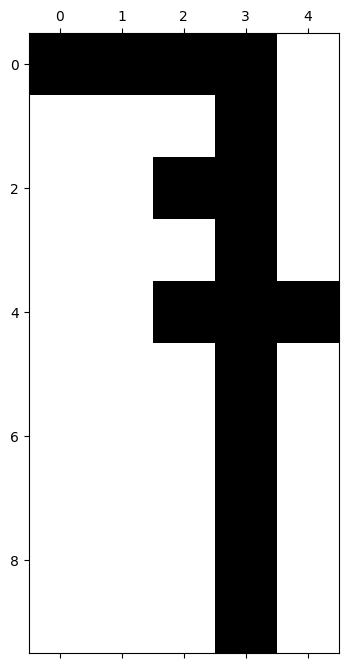

In [24]:
plt.matshow(make_random_pixel(image_7),cmap=plt.cm.gray)

In [8]:
#gürültü eklediğimiz ve bozulma yaptığımız veri setimiz
zeros = [[image_0, [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_noisy(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]],
        [make_random_pixel(image_0), [1, 0, 0, 0]]]

twos = [[image_2, [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_noisy(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]],
        [make_random_pixel(image_2), [0, 1, 0, 0]]]
fours = [[image_4, [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_noisy(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]],
        [make_random_pixel(image_4), [0, 0, 1, 0]]]
sevens = [[image_7, [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_noisy(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]],
        [make_random_pixel(image_7), [0, 0, 0, 1]]]

In [25]:
#veri setlerimizi karıştırıyoruz
random.shuffle(zeros)
random.shuffle(twos)
random.shuffle(fours)
random.shuffle(sevens)

#36 verimizi eğitim kümesi için kalan 16 verimizi test kümesi için ayırıyoruz
train_datas = np.concatenate((np.concatenate((zeros[:9], twos[:9])), np.concatenate((fours[:9], sevens[:9]))))
test_datas = np.concatenate((np.concatenate((zeros[9:], twos[9:])), np.concatenate((fours[9:], sevens[9:]))))

#ayırdığımız verilerimizi eğitim ve test listelerine atıyoruz
train_data = []
test_data = []
for i in range(len(train_datas)):
    train_data.append([np.asarray(train_datas[i][0]).reshape(-1), train_datas[i][1]])
for i in range(len(test_datas)):
    test_data.append([np.asarray(test_datas[i][0]).reshape(-1), test_datas[i][1]])


input_dimension = 50    #giriş verileri
gk_1 = 25               #gizli katman birdeki nöron sayısı
gk_2 = 10               #gizli katman ikideki nöron sayısı
out = 4                 #çıkış katman veri sayısı

#başlangıç ağırlıkları
weights_1 = (np.random.rand(gk_1, input_dimension + 1)-0.5)/10
weights_2 = (np.random.rand(gk_2, gk_1 + 1)-0.5)/10
weights_out = (np.random.rand(out, gk_2 + 1)-0.5)/10


weights_1_old = 0
weights_2_old = 0
weights_out_old = 0
Error = 0
n_learn = 0.01      #öğrenme katsayısı
alpha = 0.9         #momentum terimi için katsayı

for j in range(10000):
    Error = 0
    for i in range(len(train_data)):
        step_data = train_data[i][0]
        step_data = np.append(step_data, [1])

        vgk1_step = np.matmul(weights_1, step_data) 
        y1 = sigmoid(vgk1_step)     #ilk gizli katman çıkışı
        y1 = np.append(y1, 1)       #bayes terimi ekliyoruz

        vgk2_step = np.matmul(weights_2, y1)
        y2 = sigmoid(vgk2_step)     #ikinci gizli katman çıkışı
        y2 = np.append(y2, 1)       #bayes terimi ekliyoruz

        vo_step = np.matmul(weights_out, y2)
        yo = sigmoid(vo_step)       #çıkış matrisi

        step_error = yo - train_data[i][1]  #hatayı buluyoruz

        #yerel gradyenler
        grd_o = step_error * der_sigmoid(vo_step)
        grd_2 = np.matmul(np.transpose(weights_out)[:-1], grd_o) * der_sigmoid(vgk2_step)
        grd_1 = np.matmul(np.transpose(weights_2)[:-1], grd_2) * der_sigmoid(vgk1_step)
        #ağırlık güncelleme
        weights_1_new = weights_1 - n_learn * np.matmul(grd_1.reshape(-1, 1), np.transpose(step_data.reshape(-1, 1))) + alpha * (weights_1 - weights_1_old)
        weights_2_new = weights_2 - n_learn * np.matmul(grd_2.reshape(-1, 1), np.transpose(y1.reshape(-1, 1))) + alpha * (weights_2 - weights_2_old)
        weights_out_new = weights_out - n_learn * np.matmul(grd_o.reshape(-1, 1), np.transpose(y2.reshape(-1, 1))) + alpha * (weights_out - weights_out_old)
        #momentum teriminde kullanılmak üzere bir önceki adım ağırlıklarını kaydediyoruz
        weights_1_old = weights_1
        weights_2_old = weights_2
        weights_out_old = weights_out
        
        weights_1 = weights_1_new
        weights_2 = weights_2_new
        weights_out = weights_out_new
        #error 
        Error = Error + 0.5*np.matmul(step_error, np.transpose(step_error))

    if Error/len(train_data) < 0.001:   #durdurma kriteri
        
        break

print(Error/len(train_data))

Error = 0
for i in range(len(test_data)):
    step_data = test_data[i][0]
    step_data = np.append(step_data, [1])
    vgk1_step = np.matmul(weights_1, step_data)
    y1 = sigmoid(vgk1_step)         #ilk gizli katman çıkışı
    y1 = np.append(y1, 1)           #bayes terimi ekliyoruz
    vgk2_step = np.matmul(weights_2, y1)
    y2 = sigmoid(vgk2_step)         #ikinci gizli katman çıkışı
    y2 = np.append(y2, 1)            #bayes terimi ekliyoruz
    vo_step = np.matmul(weights_out, y2)
    yo = sigmoid(vo_step)           #çıkış terimi
    step_error = yo - test_data[i][1]
    Error = Error + 0.5*np.matmul(step_error, np.transpose(step_error))

print(Error/len(test_data))

0.0009996100749300374
0.0010873617037862335
